In [1]:
import saltproc
import matplotlib.pyplot as plt
import numpy as np
from openmc.deplete import Results
import openmc

In [2]:
ref_res = saltproc.Results('../2022-yardas-ms/model/openmc/saltproc_runtime/saltproc_results.h5')
dep_no_feed = Results('no_feeding/depletion_results.h5')
dep_with_feed = Results('with_feeding/depletion_results.h5')

In [3]:
time = dep_no_feed.get_times()
ref_time = ref_res.time_total
ref_time_idx = np.where(ref_time == time[-1])[0][-1] + 1
ref_time = ref_time[:ref_time_idx]

### Compare Keff

In [5]:
keff_ref = [k.n for k in ref_res.keff[:ref_time_idx]]
keff_no_feed = dep_no_feed.get_keff()[1][:,0]
keff_with_feed = dep_with_feed.get_keff()[1][:,0]

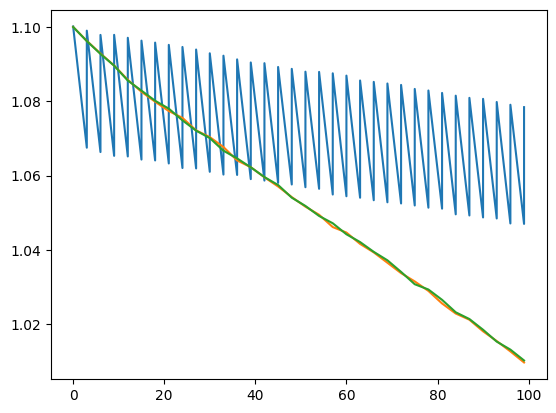

In [6]:
plt.plot(ref_time, keff_ref, label='Ref')
plt.plot(time, keff_no_feed, label='no_feed')
plt.plot(time, keff_with_feed, label='with_feed')

### Th232 and U233

In [7]:
ss_idx = []
s_idx = 0
for t in ref_time:
    s_idx += 1
    ss_idx += [s_idx]

u233_ref = ref_res.get_nuclide_mass('fuel', 'U233', ss_idx)
th232_ref = ref_res.get_nuclide_mass('fuel', 'Th232', ss_idx)

In [17]:
def get_mass_density(nuc, res):
    time, atoms = res.get_atoms('1', nuc)
    mass = atoms * openmc.data.atomic_mass(nuc) \
                        / openmc.data.AVOGADRO
    return mass


In [18]:
th232_no_feed = get_mass_density('Th232', dep_no_feed)
u233_no_feed = get_mass_density('U233', dep_no_feed)

th232_with_feed = get_mass_density('Th232', dep_with_feed)
u233_with_feed = get_mass_density('U233', dep_with_feed)

#### u233

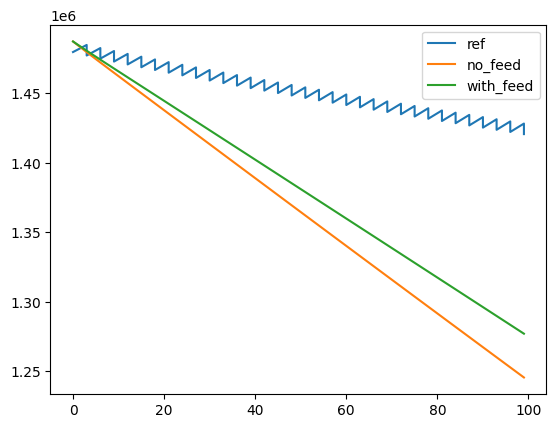

In [19]:
plt.plot(ref_time, u233_ref, label='ref')
plt.plot(time, u233_no_feed, label='no_feed')
plt.plot(time, u233_with_feed, label='with_feed')
plt.legend()

#### th232

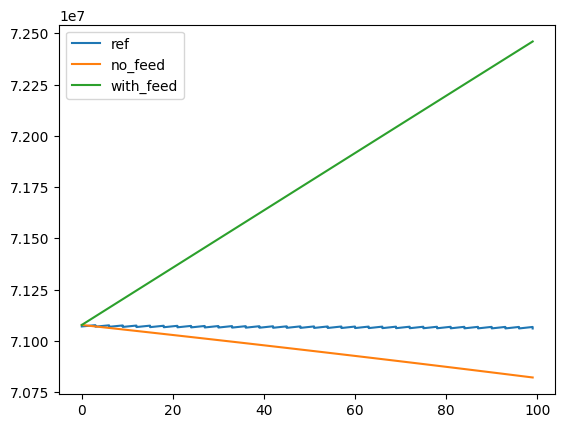

In [20]:
plt.plot(ref_time, th232_ref, label='ref')
plt.plot(time, th232_no_feed, label='no_feed')
plt.plot(time, th232_with_feed, label='with_feed')
plt.legend()